<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa1_um_uw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
# należy pobrać plik z danymi do zadania
uploaded = files.upload()

Saving PCA_three_clusters_data.csv to PCA_three_clusters_data.csv


In [ ]:
df = pd.read_csv('PCA_three_clusters_data.csv')

In [ ]:
# ramka danych z samymi współrzędnymi i lista etykiet
df_points = df.iloc[:,0:3]
klasa = list(df.iloc[:,3])
df_points.head()

,x,y,z
0,0.647689,-0.138264,3.512299
1,-0.234137,-0.234153,10.769447
2,-0.469474,0.767435,11.166721
3,-0.465730,-0.463418,3.836479
4,-1.724918,-1.913280,1.710932


In [ ]:
# standaryzacja cech do pca
df_scaled = StandardScaler().fit_transform(df_points)

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2
0,-0.833514,-0.588058,0.481100
1,-1.217495,-0.650860,1.630114
2,-1.319970,0.005120,1.693014
3,-1.318340,-0.801014,0.532427
4,-1.866639,-1.750586,0.195892


In [ ]:
#wybór transformacji
pca = PCA(n_components=2)
#transformacja i zamienienie typu na ramkę danych
df_scaled_pca = pca.fit_transform(df_scaled)
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=['pca1', 'pca2'])
df_scaled_pca["class"] = klasa
df_scaled_pca.head()
type(df_scaled_pca)
#wypisanie składowych głównych
pca.components_

array([[ 0.72005783,  0.56946   , -0.39652494],
       [-0.02368275,  0.59126692,  0.80612813]])

Text(0.5, 1.0, 'PCA of three clusters')

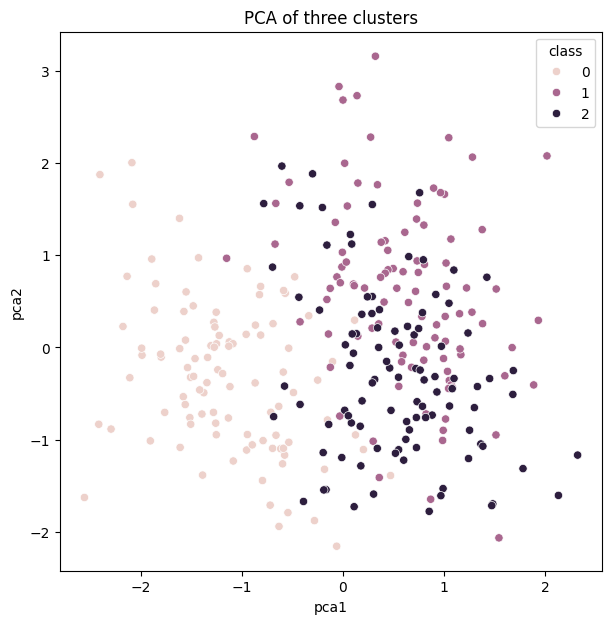

In [ ]:
#wykres punktowy obserwacji we współrzędnych w bazie ze składowych głównych
import seaborn as sns
plt.rcParams["figure.figsize"] = (7,7)
sns.scatterplot(data= df_scaled_pca, x= "pca1", y = "pca2", hue= "class",legend="full")
plt.title("PCA of three clusters")

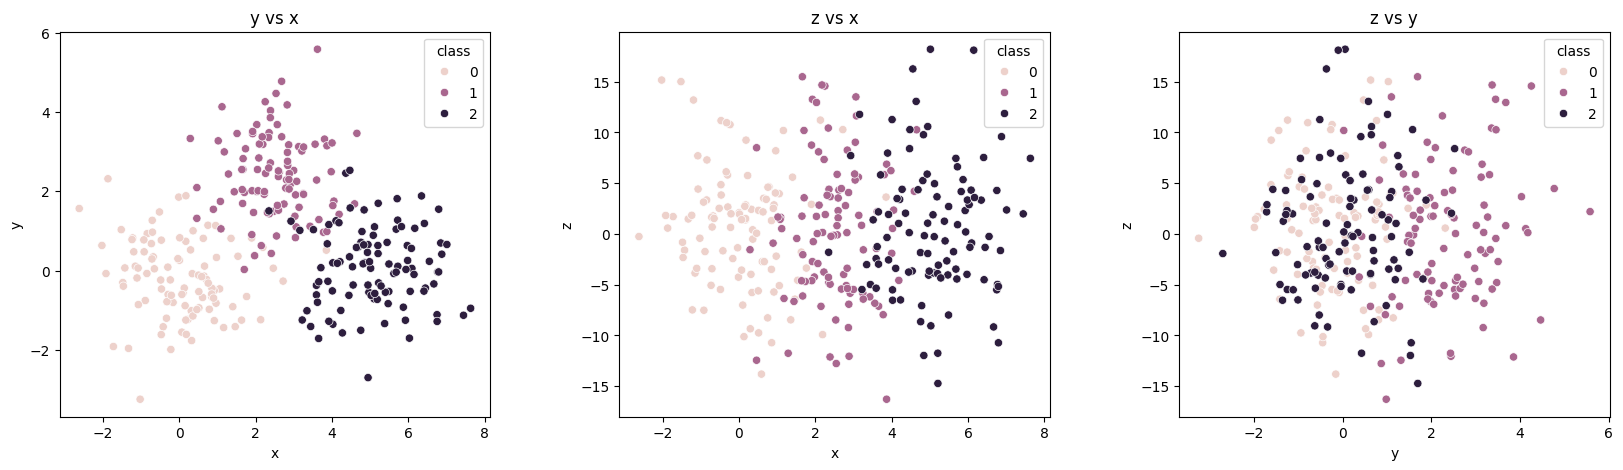

In [ ]:
# inne wykresy:
plt.rcParams["figure.figsize"] = (20,5)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 3, 1)
sns.scatterplot(df.iloc[:, [True, True, False, True]], x = 'x', y='y', hue='class')
plt.title('y vs x')
plt.subplot(1, 3, 2)
sns.scatterplot(df.iloc[:, [True, False, True, True]], x = 'x', y='z', hue='class')
plt.title('z vs x')
plt.subplot(1, 3, 3)
sns.scatterplot(df.iloc[:, [False, True, True, True]], x = 'y', y='z', hue='class')
plt.title('z vs y')
plt.show()


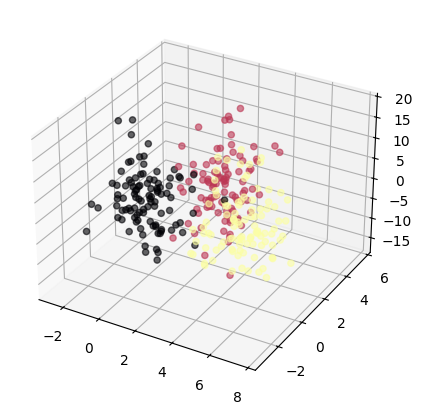

In [ ]:
# wykres 3D
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap
mycmap = ListedColormap(["blue", "red"])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.loc[:, 'x'], df.loc[:, 'y'], df.loc[:, 'z'], c = df.loc[:,"class"], marker = 'o', alpha=0.6, cmap='inferno')
plt.title("3D scatterplot")

Odpowiedź na pierwsze pytanie: Analiza (PCA) chociaż w pierwszej kolejności służy do zmniejszania wymiarowości danych, szukając wektorów, takich, że blisko prostych je wyznaczonych jest największe skupienie obserwacji lub równoważnie wariancja punktów zrzutowanych na te proste jest największa. Ta metoda pozwala uprościć analizę nie tracąc zbyt wiele informacji o strukturze danych w oryginalnej pełnowymiarowej postaci. Sama w sobie nie jest metodą klasteryzacji, dlatego nie zawsze pomaga w odseporowywaniu klastrów. W przypadku zadanego zbioru punktów widzimy, że rzutowanie punktów na płaszczyznę zadaną przez z=0 (wykres y vs x) w lepszy sposób separuje trzy klastry.   

zadanie 2

PCA wymaga standaryzacji cech przede wszystkim ze względu na potencjalne różnice w skalach wartości, które przyjmują poszczególne cechy. Szukając składowych głównych maksymalizujemy wariancję próbki zrzutowanej na daną

In [16]:
pca2 = PCA(n_components=2)
df_points2 = pca2.fit_transform(df_points)

pca.components_, pca2.components_

(array([[ 0.72005783,  0.56946   , -0.39652494],
        [-0.02368275,  0.59126692,  0.80612813]]),
 array([[-1.07398893e-02,  8.40647979e-04,  9.99941972e-01],
        [ 9.99078354e-01,  4.15697634e-02,  1.06956660e-02]]))

In [17]:
 df_points2= pd.DataFrame(df_points2, columns=['pca złe 1', 'pca złe 2'])
df_points2["class"]=klasa
df_points2.head()

,pca złe 1,pca złe 2,class
0,3.058241,-1.917255,0
1,10.324358,-2.724634,0
2,10.724978,-2.913869,0
3,3.394086,-3.039696,0
4,1.280967,-4.380728,0


In [18]:
df.head()

,x,y,z,class
0,0.647689,-0.138264,3.512299,0
1,-0.234137,-0.234153,10.769447,0
2,-0.469474,0.767435,11.166721,0
3,-0.465730,-0.463418,3.836479,0
4,-1.724918,-1.913280,1.710932,0


In [21]:
print(round(np.var(df.loc[:,'x']), 4),round(np.var(df.loc[:,'y']), 4),round(np.var(df.loc[:,'z']),4))

5.2741 2.3313 39.8915


Text(0.5, 1.0, 'PCA of three clusters')

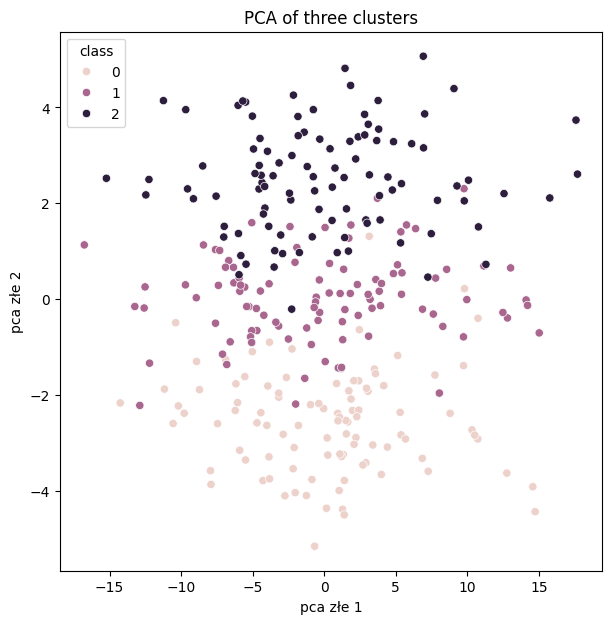

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (7,7)
sns.scatterplot(data= df_points2, x= "pca złe 1", y = "pca złe 2", hue= "class",legend="full")
plt.title("PCA of three clusters")